# Exercise 2: Variable flux reluctance machine

- Explain that we are going to look at the model of real machine
- The implementation is more dificult because of the geometry, rotating bpart, timeslab. 
- Otherwise the platform is the same as for the first example
- Geometry of the machine with the labels present
- The implementation (geometry mathematical implementation etc..) is in the file .. vfrm.py, here we interact with the model for the demonstration purposes.

In [1]:
from vfrm import Driver, Geometry, Machine, Angle, ElectricCurrent, Torque
import nutils.function
import treelog_notebook

Driver is the description of the currents (that drives the motor)
The machine model is the entire mathematical description including the namespace from the example 1 and plotting functions.
Driver contain parameters that are later fed to the machine model

In [2]:
driver = Driver(
    peak_ac_current=nutils.function.Argument('Iacpeak', ()) * ElectricCurrent('A'),
    dc_current=nutils.function.Argument('Idc', ()) * ElectricCurrent('A'),
)
machine = Machine(driver=driver)

mesh > gmsh > Running 'C:\Users\mcurti\.virtualenvs\iemdc-OIQ8cT5z\Scripts\gmsh.bat\..\gmsh C:\Users\mcurti\Documents\projects\iemdc\vfrm.geo -o C:\Users\mcurti\AppData\Local\Temp\tmp59dcpfjb.msh -order 2 -2 -bin -setnumber r_ri 0.0105 -setnumber h_ry 0.0205 -setnumber h_rt 0.014400000000000001 -setnumber h_a 0.000535 -setnumber h_sea 0.00775 -setnumber h_sed 0.00775 -setnumber h_sca 0.009000000000000001 -setnumber h_scd 0.00775 -setnumber h_s 0.024100000000000003 -setnumber a_rti 0.005 -setnumber a_rto 0.01 -setnumber n_rt 5 -setnumber a_sti 0.013000000000000001 -setnumber n_st 6 -setnumber h_e 0.01 -setnumber n_ea 1 -setnumber m 2 -setnumber f_i 0.5' [Gmsh 4.13.1, 1 node, max. 1 thread]
mesh > gmsh > Started on Sun May 18 06:25:22 2025
mesh > gmsh > Reading 'C:\Users\mcurti\Documents\projects\iemdc\vfrm.geo'...
mesh > gmsh > Done reading 'C:\Users\mcurti\Documents\projects\iemdc\vfrm.geo'
mesh > gmsh > Reconstructing periodicity for curve connection 11 - 1
mesh > gmsh > Reconstructin

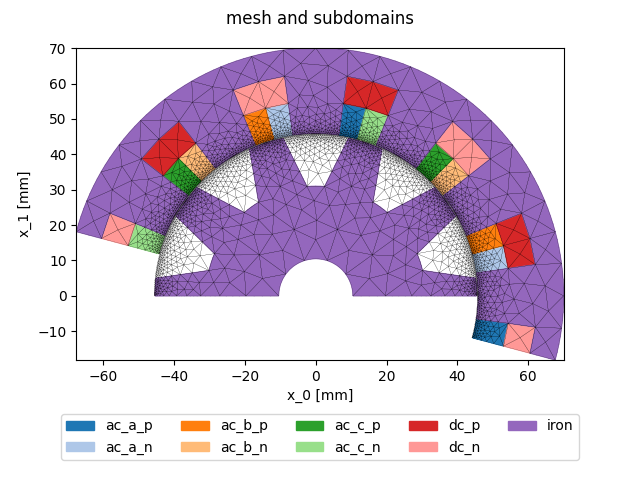

In [3]:
machine.plot_mesh()

The model is solved given the input currents, which are identified as peak value for AC currents and the constant current.

In [4]:
args = dict(
    Iacpeak=30, # unit: A
    Idc=25, # unit: A
)
args = machine.solve(arguments=args)

solve > solve > solving for argument A2 (8,13295) and λ (8,540) using direct method
solve > solve > residual norm: 4.1e-16


Once the magnetic models is solved, we have access to the solution for the entire timeslab. We could plot various field quantities at different position.

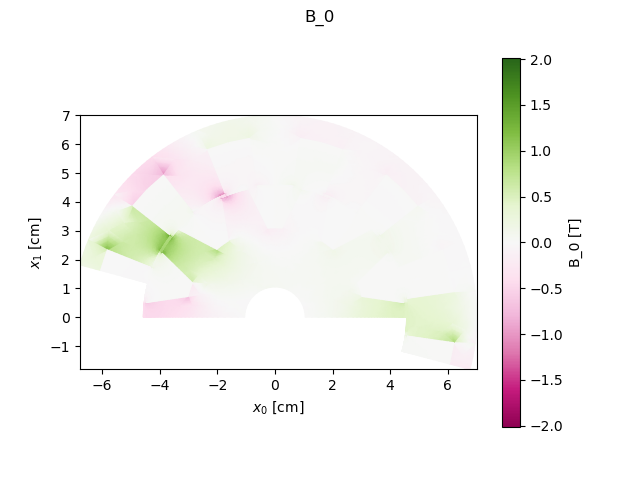

In [5]:
machine.plot_field(
    'B_0', 'T',
    thetam=Angle('0deg'),
    clim='symmetric',
    cmap='PiYG',
    arguments=args,
)

## Comment some snippets with different plots

We could also plot quantities invarient in space (time series), such as flux, emf along the entire timeslab

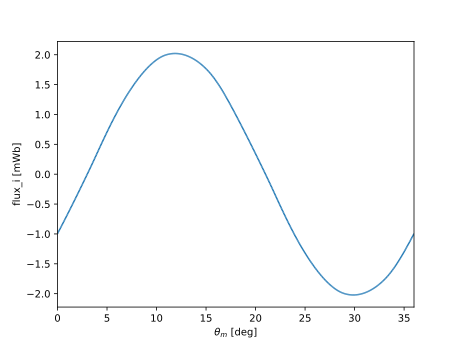

In [5]:
machine.plot_thetam('flux_i', 'mWb', arguments=args, phase=True)

# Snippet for emf
# Snippet for the torque for 6 degrees long
# Flux for multiple phases

- below to be removed

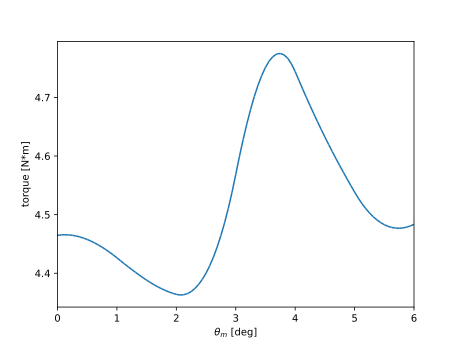

In [6]:
machine.plot_thetam('torque', 'N*m', arguments=args)

In [7]:
machine.print_scalar('avgtorque', 'N*m', arguments=args)

avgtorque: 4.519N*m


- Explanation of the minimization problem

In [8]:
from nutils_solver_extra import minimize

lambdatorque = nutils.function.Argument('lambdatorque', ()) / Torque('N*m')
fun = ('Pac + Pdc' @ machine.ns) / 'W' \
    + lambdatorque * (machine.ns.avgtorque - Torque('10N*m'))

args = minimize(
    fun,
    'Iacpeak,Idc,lambdatorque',
    machine.residual,
    machine.trials,
    machine.tests,
    constrain=machine.constraints,
    tol=1e-8,
    arguments=args,
)

machine.print_scalar('avgtorque', 'N*m', arguments=args)
machine.print_scalar('Iacpeak', 'A', arguments=args)
machine.print_scalar('Idc', 'A', arguments=args)
machine.print_scalar('Pac', 'W', arguments=args)
machine.print_scalar('Pdc', 'W', arguments=args)
machine.print_scalar('Protor', 'W', arguments=args)

minimize > minimizing for lambdatorque () and for Iacpeak () and Idc () via A2 (8, 13295) and λ (8, 540)
minimize > iter 0 > scalar = 6.159e+02, norm([grad(scalar), residual]) = 3.303e+01
minimize > iter 1 > scalar = 1.286e+03, norm([grad(scalar), residual]) = 3.159e+01
minimize > iter 2 > scalar = 1.366e+03, norm([grad(scalar), residual]) = 4.040e+00
minimize > iter 3 > scalar = 1.347e+03, norm([grad(scalar), residual]) = 5.055e-01
minimize > iter 4 > scalar = 1.346e+03, norm([grad(scalar), residual]) = 3.845e-03
minimize > iter 5 > scalar = 1.346e+03, norm([grad(scalar), residual]) = 2.816e-07
minimize > iter 6 > scalar = 1.346e+03, norm([grad(scalar), residual]) = 6.677e-13
avgtorque: 10.000N*m
Iacpeak: 52.698A
Idc: 31.494A
Pac: 1198.069W
Pdc: 148.268W
Protor: 1047.198W


In [ ]:
print(1047.198 + )